<a href="https://colab.research.google.com/github/courtneymarie2024/Wealth-Management/blob/main/Bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating sample bond data

# New Section

This notebook generates the sample bond data used by the BasicBond model.
Numpy and QuantLib is required to run this notebook.

**Columns:**

* `bond_id`: Bond identifier
* `settlement_days`: 0
* `face_value`: Face value. Uniformly distributed from 10,000 to 1,000,000.
* `issue_date`: Issue date. Uniformly distributed between 1 Jan 2017 to 31 Dec 2021.
* `bond_term`:  Bond term in years. Evenly distributed among 5, 10, 15, 20, 25, 30 years.
* `maturity_date`: Matuirty date. `issue_date` + `bond_term`.
* `tenor`: "6M" or "1Y" to indicate length of time between each coupon payment. The samples are evenry distributed.
* `coupon_rate`: Coupon rate. Uniformly distributed between 0 and 8% by 1%
* `z_spread`: Z-spread. Uniformly distributed from 0% to 4%.

**Number of data:**

* 1000


Click the badge below to run this notebook online on Google Colab. You need a Google account and need to be logged in to it to run this notebook on Google Colab.
[![Run on Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lifelib-dev/lifelib/blob/current/lifelib/libraries/assets/generate_bond_data.ipynb)


The next code cell below is relevant only when you run this notebook on Google Colab. It installs lifelib and creates a copy of the library for this notebook.

In [ ]:
import sys, os

if 'google.colab' in sys.modules:
    lib = 'assets'; lib_dir = '/content/'+ lib
    if not os.path.exists(lib_dir):
        !pip install lifelib
        !pip install QuantLib
        import lifelib; lifelib.create(lib, lib_dir)

    %cd $lib_dir

/content/assets


In [ ]:
import numpy as np
from numpy.random import default_rng  # Requires NumPy 1.17 or newer

rng = default_rng(12345)

# Number of Data
DataSize = 1000

# Settlement Days: 0
settlement_days = np.array([0] * DataSize)

# Face Value (Float): 10000 - 1000000

face_value = np.round((1000000 - 10000) * rng.random(size=DataSize) + 10000, -3)

# Issue Date (datetime64): 1 Jan 2017 to 31 Dec 2021

import datetime
date_begin = datetime.date(2017,1,1)
date_end = datetime.date(2022,1,1)

issue_date = (date_end - date_begin) * rng.random(size=DataSize) + date_begin

# Bond Term: 5,..,40 years
import QuantLib as ql

terms = [ql.Period(y, ql.Years) for y in [5, 10, 15, 20, 25, 30]]
bond_term = [terms[i] for i in rng.integers(low=0, high=len(terms), size=DataSize)]

# Maturity Date (datetime64): Issue date + Bond Term
maturity_date = [ql.Date(issue.day, issue.month, issue.year) + term for issue, term in zip(issue_date, bond_term)]


# Coupon Tenor: "6M" or "1Y"
_tenor = ["6M", "1Y"]
tenor = np.fromiter(map(lambda i: _tenor[i], rng.integers(low=0, high=len(_tenor), size=DataSize)), np.dtype('<U2'))

# Coupon Rate: 0% - 8%
coupon_rate = rng.integers(low=0, high=9, size=DataSize) / 100

# Z-spread: 0% - 4%
z_spread = np.round(rng.random(size=DataSize) * 0.04, 4)

In [ ]:
import pandas as pd

attrs = [
    "settlement_days",
    "face_value",
    "issue_date",
    "bond_term",
    "maturity_date",
    "tenor",
    "coupon_rate",
    "z_spread"
]

data = [
    settlement_days,
    face_value,
    issue_date,
    [y.length() for y in bond_term],
    [d.to_date() for d in maturity_date],
    tenor,
    coupon_rate,
    z_spread
]

bond_data = pd.DataFrame(dict(zip(attrs, data)), index=range(1, DataSize+1))
bond_data.index.name = "bond_id"
bond_data

,settlement_days,face_value,issue_date,bond_term,maturity_date,tenor,coupon_rate,z_spread
bond_id,,,,,,,,
1,0,235000.0,2017-12-12,10,2027-12-12,1Y,0.07,0.0304
2,0,324000.0,2021-11-29,25,2046-11-29,1Y,0.08,0.0304
3,0,799000.0,2017-02-03,10,2027-02-03,6M,0.03,0.0155
4,0,679000.0,2017-11-19,10,2027-11-19,1Y,0.08,0.0229
5,0,397000.0,2018-07-01,5,2023-07-01,6M,0.06,0.0142
...,...,...,...,...,...,...,...,...
996,0,560000.0,2019-02-16,10,2029-02-16,1Y,0.06,0.0261
997,0,161000.0,2020-03-12,30,2050-03-12,6M,0.05,0.0199
998,0,375000.0,2019-05-05,5,2024-05-05,1Y,0.03,0.0138


# Annual Interest = Nominal Yield * Face Value

# New Section

In [ ]:
bond_data['annual_interest'] = bond_data['coupon_rate'] * bond_data['face_value']

# Current Yield = Annual Interest / Current Market Value

# New Section

In [ ]:
bond_data['current_yield'] = bond_data['annual_interest'] / 1000000

In [ ]:
bond_data

,settlement_days,face_value,issue_date,bond_term,maturity_date,tenor,coupon_rate,z_spread,annual_interest,current_yield
bond_id,,,,,,,,,,
1,0,235000.0,2017-12-12,10,2027-12-12,1Y,0.07,0.0304,16450.0,0.01645
2,0,324000.0,2021-11-29,25,2046-11-29,1Y,0.08,0.0304,25920.0,0.02592
3,0,799000.0,2017-02-03,10,2027-02-03,6M,0.03,0.0155,23970.0,0.02397
4,0,679000.0,2017-11-19,10,2027-11-19,1Y,0.08,0.0229,54320.0,0.05432
5,0,397000.0,2018-07-01,5,2023-07-01,6M,0.06,0.0142,23820.0,0.02382
...,...,...,...,...,...,...,...,...,...,...
996,0,560000.0,2019-02-16,10,2029-02-16,1Y,0.06,0.0261,33600.0,0.03360
997,0,161000.0,2020-03-12,30,2050-03-12,6M,0.05,0.0199,8050.0,0.00805
998,0,375000.0,2019-05-05,5,2024-05-05,1Y,0.03,0.0138,11250.0,0.01125


# Yield to Maturity = Annual Interest - (Premium / Years to Maturity) / Avg Price of the Bond

### **premium = Current Market Price - Face Value**

# New Section

In [ ]:
# years to maturity

from datetime import date

# Convert the 'issue_date' and 'maturity_date' columns to datetime objects
bond_data['issue_date'] = pd.to_datetime(bond_data['issue_date'])
bond_data['maturity_date'] = pd.to_datetime(bond_data['maturity_date'])

# Calculate the difference in years and add a new column 'years_to_maturity'
bond_data['years_to_maturity'] = (bond_data['maturity_date'] - bond_data['issue_date']).dt.days / 365.25

bond_data['years_to_maturity'] = bond_data['years_to_maturity'].round(2)


In [ ]:
# premium
bond_data['premium'] = 1000000 - bond_data['face_value']

In [ ]:
bond_data

,settlement_days,face_value,issue_date,bond_term,maturity_date,tenor,coupon_rate,z_spread,annual_interest,current_yield,years_to_maturity,premium
bond_id,,,,,,,,,,,,
1,0,235000.0,2017-12-12,10,2027-12-12,1Y,0.07,0.0304,16450.0,0.01645,10.0,765000.0
2,0,324000.0,2021-11-29,25,2046-11-29,1Y,0.08,0.0304,25920.0,0.02592,25.0,676000.0
3,0,799000.0,2017-02-03,10,2027-02-03,6M,0.03,0.0155,23970.0,0.02397,10.0,201000.0
4,0,679000.0,2017-11-19,10,2027-11-19,1Y,0.08,0.0229,54320.0,0.05432,10.0,321000.0
5,0,397000.0,2018-07-01,5,2023-07-01,6M,0.06,0.0142,23820.0,0.02382,5.0,603000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,560000.0,2019-02-16,10,2029-02-16,1Y,0.06,0.0261,33600.0,0.03360,10.0,440000.0
997,0,161000.0,2020-03-12,30,2050-03-12,6M,0.05,0.0199,8050.0,0.00805,30.0,839000.0
998,0,375000.0,2019-05-05,5,2024-05-05,1Y,0.03,0.0138,11250.0,0.01125,5.0,625000.0


In [ ]:

# yield to maturity

bond_data['yield_to_maturity'] = (bond_data['annual_interest'] - ( bond_data['premium'] / bond_data['years_to_maturity'])) / ((1000000 + bond_data['face_value']) / 2)

In [ ]:
bond_data

,settlement_days,face_value,issue_date,bond_term,maturity_date,tenor,coupon_rate,z_spread,annual_interest,current_yield,years_to_maturity,premium,yield_to_maturity
bond_id,,,,,,,,,,,,,
1,0,235000.0,2017-12-12,10,2027-12-12,1Y,0.07,0.0304,16450.0,0.01645,10.0,765000.0,-0.097247
2,0,324000.0,2021-11-29,25,2046-11-29,1Y,0.08,0.0304,25920.0,0.02592,25.0,676000.0,-0.001692
3,0,799000.0,2017-02-03,10,2027-02-03,6M,0.03,0.0155,23970.0,0.02397,10.0,201000.0,0.004302
4,0,679000.0,2017-11-19,10,2027-11-19,1Y,0.08,0.0229,54320.0,0.05432,10.0,321000.0,0.026468
5,0,397000.0,2018-07-01,5,2023-07-01,6M,0.06,0.0142,23820.0,0.02382,5.0,603000.0,-0.138554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,560000.0,2019-02-16,10,2029-02-16,1Y,0.06,0.0261,33600.0,0.03360,10.0,440000.0,-0.013333
997,0,161000.0,2020-03-12,30,2050-03-12,6M,0.05,0.0199,8050.0,0.00805,30.0,839000.0,-0.034310
998,0,375000.0,2019-05-05,5,2024-05-05,1Y,0.03,0.0138,11250.0,0.01125,5.0,625000.0,-0.165455


# Premium Exaxmple

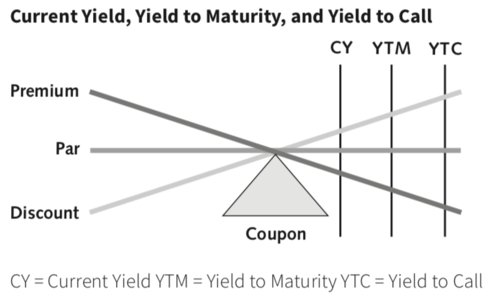

# New Section

In [ ]:
# EXAMPLE -  MARKET VALUE IS 1,000,000 (premium)

premium_bond = bond_data.copy()

# CY is lower than the coupon rate - you are paying more for the bond than its face value
premium_bond['current_yield'] = premium_bond['annual_interest'] / 1000000

# premium
premium_bond['premium'] = 1000000 - premium_bond['face_value']

# YTM is lower than the nominal yield - capital loss at maturity
premium_bond['yield_to_maturity'] = (premium_bond['annual_interest'] - (premium_bond['premium'] / premium_bond['years_to_maturity'])) / ((premium_bond['face_value'] + 1000000) / 2)

premium_bond


,settlement_days,face_value,issue_date,bond_term,maturity_date,tenor,coupon_rate,z_spread,annual_interest,current_yield,years_to_maturity,premium,yield_to_maturity
bond_id,,,,,,,,,,,,,
1,0,235000.0,2017-12-12,10,2027-12-12,1Y,0.07,0.0304,16450.0,0.01645,10.0,765000.0,-0.097247
2,0,324000.0,2021-11-29,25,2046-11-29,1Y,0.08,0.0304,25920.0,0.02592,25.0,676000.0,-0.001692
3,0,799000.0,2017-02-03,10,2027-02-03,6M,0.03,0.0155,23970.0,0.02397,10.0,201000.0,0.004302
4,0,679000.0,2017-11-19,10,2027-11-19,1Y,0.08,0.0229,54320.0,0.05432,10.0,321000.0,0.026468
5,0,397000.0,2018-07-01,5,2023-07-01,6M,0.06,0.0142,23820.0,0.02382,5.0,603000.0,-0.138554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,560000.0,2019-02-16,10,2029-02-16,1Y,0.06,0.0261,33600.0,0.03360,10.0,440000.0,-0.013333
997,0,161000.0,2020-03-12,30,2050-03-12,6M,0.05,0.0199,8050.0,0.00805,30.0,839000.0,-0.034310
998,0,375000.0,2019-05-05,5,2024-05-05,1Y,0.03,0.0138,11250.0,0.01125,5.0,625000.0,-0.165455


In [ ]:
fig = px.scatter(
    premium_bond,
    x='coupon_rate',
    y='yield_to_maturity',
    title='Comparison of Yield to Maturity vs. Coupon Rate',
    labels={
        'Coupon Rate': 'Coupon Rate',
        'Current Yield': 'Current Yield'
    }
)

# 3. Add a line to show where Coupon Rate equals Current Yield
# This is a useful visual reference for par bonds.
fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=max(premium_bond['coupon_rate'].max(), premium_bond['yield_to_maturity'].max()),
    y1=max(premium_bond['coupon_rate'].max(), premium_bond['yield_to_maturity'].max()),
    line=dict(color='Red', width=2, dash='dash')
)

# 4. Display the plot
fig.show()

In [ ]:
fig = px.scatter(
    premium_bond,
    x='coupon_rate',
    y='current_yield',
    title='Comparison of Current Yield vs. Coupon Rate',
    labels={
        'Coupon Rate': 'Coupon Rate',
        'Current Yield': 'Current Yield'
    }
)

# 3. Add a line to show where Coupon Rate equals Current Yield
# This is a useful visual reference for par bonds.
fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=max(premium_bond['coupon_rate'].max(), premium_bond['current_yield'].max()),
    y1=max(premium_bond['coupon_rate'].max(), premium_bond['current_yield'].max()),
    line=dict(color='Red', width=2, dash='dash')
)

# 4. Display the plot
fig.show()

# Discount Example

# New Section

In [ ]:
# EXAMPLE - MARKET VALUE IS 1,000 (discount)

discount_bond = bond_data.copy()

# CY is higher than coupon rate - bond is at a discount (below face value)
discount_bond['current_yield'] = discount_bond['annual_interest'] / 1000

discount_bond['premium'] = 1000 - discount_bond['face_value']

# YTM is higher than the nominal yield - capital gain at maturity
discount_bond['yield_to_maturity'] = (discount_bond['annual_interest'] - (discount_bond['premium'] / discount_bond['years_to_maturity'])) / ((1000+discount_bond['face_value']) / 2)

discount_bond

,settlement_days,face_value,issue_date,bond_term,maturity_date,tenor,coupon_rate,z_spread,annual_interest,current_yield,years_to_maturity,premium,yield_to_maturity
bond_id,,,,,,,,,,,,,
1,0,235000.0,2017-12-12,10,2027-12-12,1Y,0.07,0.0304,16450.0,16.45,10.0,-234000.0,0.337712
2,0,324000.0,2021-11-29,25,2046-11-29,1Y,0.08,0.0304,25920.0,25.92,25.0,-323000.0,0.239015
3,0,799000.0,2017-02-03,10,2027-02-03,6M,0.03,0.0155,23970.0,23.97,10.0,-798000.0,0.259425
4,0,679000.0,2017-11-19,10,2027-11-19,1Y,0.08,0.0229,54320.0,54.32,10.0,-678000.0,0.359176
5,0,397000.0,2018-07-01,5,2023-07-01,6M,0.06,0.0142,23820.0,23.82,5.0,-396000.0,0.517688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,560000.0,2019-02-16,10,2029-02-16,1Y,0.06,0.0261,33600.0,33.60,10.0,-559000.0,0.319073
997,0,161000.0,2020-03-12,30,2050-03-12,6M,0.05,0.0199,8050.0,8.05,30.0,-160000.0,0.165226
998,0,375000.0,2019-05-05,5,2024-05-05,1Y,0.03,0.0138,11250.0,11.25,5.0,-374000.0,0.457713


# Data Visualization

# New Section

In [ ]:
import plotly.express as px
# 2. Create the scatter plot
fig = px.scatter(
    bond_data,
    x=bond_data.index,
    y='premium',
    color=bond_data.index,
    title='Bond Premium Amounts',
    labels={'x': 'Bond ID', 'y': 'Premium Amount ($)'}
)

# Show the plot
fig.show()

In [ ]:
# Create the bar plot
fig = px.bar(bond_data, y='premium', title='Bond Premium Amounts', color=bond_data.index)
fig.show()

In [ ]:
import plotly.express as px
# 2. Create the scatter plot
fig = px.scatter(
    bond_data,
    x=bond_data.index,
    y='face_value',
    color=bond_data.index,
    title='Bond Face Value Amounts',
    labels={'x': 'Bond ID', 'y': 'Face Value Amount ($)'}
)

# Show the plot
fig.show()

In [ ]:
# Create the bar plot
fig = px.bar(bond_data, y='face_value', title='Bond Face Value Amounts', color=bond_data.index)
fig.show()

## 3D Plot

# New Section

In [ ]:
import plotly.graph_objects as go
reference_date = pd.to_datetime('2017-01-01')
bond_data['years_since_ref'] = (pd.to_datetime(bond_data['issue_date']) - reference_date).dt.days / 365.25

# Create the 3D surface plot
fig = go.Figure(data=[go.Mesh3d(
    x=bond_data['years_since_ref'],
    y=bond_data['bond_term'],
    z=bond_data['yield_to_maturity'],
    opacity=0.5,
    showscale=False
)])

# Add layout and labels
fig.update_layout(
    title='3D Plot of Bond Yield to Maturity',
    scene=dict(
        xaxis=dict(title='Years Since Reference Date',
                   backgroundcolor="rgb(200, 200, 230)"),
        yaxis=dict(title='Time to Maturity (Years)',
                   backgroundcolor="rgb(230, 200,230)"),
        zaxis=dict(title='Yield to Maturity (YTM)',
                   backgroundcolor="rgb(230, 230,200)"),
    )
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- Assumed Data Creation (You must run the bond data generation code first) ---
# bond_data = ... (your DataFrame with ytm, bond_term, and issue_date)

# Create a numerical 'years_since_ref' column from the issue_date.
# This serves as the "years" axis for the 3D plot.
reference_date = pd.to_datetime('2017-01-01')
bond_data['years_since_ref'] = (pd.to_datetime(bond_data['issue_date']) - reference_date).dt.days / 365.25

# Create the 3D surface plot
fig = go.Figure(data=[go.Mesh3d(
    x=bond_data['years_since_ref'],
    y=bond_data['bond_term'],
    z=bond_data['yield_to_maturity'],
    # Add intensity and colorscale arguments
    intensity=bond_data['yield_to_maturity'],
    colorscale='thermal'
)])

# Update the plot layout, title, and axis labels
fig.update_layout(
    title='3D Plot of Bond Yields Over Time',
    scene=dict(
        xaxis_title='Years Since 2017',
        yaxis_title='Time to Maturity (Years)',
        zaxis_title='Yield to Maturity (YTM)'
    ),
    width=1000,
    height=800
)

fig.show()


In [ ]:
# Convert the 'issue date' column to datetime objects
bond_data2 = bond_data[['issue_date', 'bond_term', 'yield_to_maturity']]
bond_data2['issue_date'] = pd.to_datetime(bond_data2['issue_date'])

# 2. Extract the year from the issue date
bond_data2['issue_year'] = bond_data2['issue_date'].dt.year

# 3. Use .pivot_table() to reshape the data
# This handles the "Index contains duplicate entries" error
# by using the 'mean' function to aggregate any duplicate YTM values.
pivot_table = bond_data2.pivot_table(
    index='issue_year',
    columns='bond_term',
    values='yield_to_maturity',
    aggfunc='mean'
)

# 4. Get the x, y, and z values for the plot
x = pivot_table.columns.values
y = pivot_table.index.values
z = pivot_table.values

# 5. Create the 3D surface plot using plotly.graph_objects
fig = go.Figure(data=[go.Surface(
    z=z,
    x=x,
    y=y,
    colorscale='Rainbow',  # Sets the color scheme
    showscale=True
)])

# 6. Customize the plot's layout
fig.update_layout(
    title='YTM Surface Plot',
    scene=dict(
        xaxis_title='Bond Term (Years)',
        yaxis_title='Issue Year',
        zaxis_title='Yield to Maturity (YTM)'
    ),
    width=1000,
    height=800
)

# 7. Display the plot (in your own environment)
fig.show()

/tmp/ipython-input-3844203688.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3844203688.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Premium Example

In [ ]:
# Convert the 'issue date' column to datetime objects
premium_bond2 = premium_bond[['issue_date', 'bond_term', 'yield_to_maturity']]
premium_bond2['issue_date'] = pd.to_datetime(premium_bond2['issue_date'])

# 2. Extract the year from the issue date
premium_bond2['issue_year'] = premium_bond2['issue_date'].dt.year

# 3. Use .pivot_table() to reshape the data
# This handles the "Index contains duplicate entries" error
# by using the 'mean' function to aggregate any duplicate YTM values.
pivot_table = premium_bond2.pivot_table(
    index='issue_year',
    columns='bond_term',
    values='yield_to_maturity',
    aggfunc='mean'
)

# 4. Get the x, y, and z values for the plot
x = pivot_table.columns.values
y = pivot_table.index.values
z = pivot_table.values

# 5. Create the 3D surface plot using plotly.graph_objects
fig = go.Figure(data=[go.Surface(
    z=z,
    x=x,
    y=y,
    colorscale='Rainbow',  # Sets the color scheme
    showscale=True
)])

# 6. Customize the plot's layout
fig.update_layout(
    title='Premium Bond YTM Surface Plot',
    scene=dict(
        xaxis_title='Bond Term (Years)',
        yaxis_title='Issue Year',
        zaxis_title='Yield to Maturity (YTM)'
    ),
    width=1000,
    height=800
)

# 7. Display the plot (in your own environment)
fig.show()

/tmp/ipython-input-205132517.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-205132517.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter_3d(
    premium_bond,
    x='coupon_rate',
    y='current_yield',
    z='yield_to_maturity',
    color='yield_to_maturity',  # Color the points based on YTM
    color_continuous_scale='thermal'  # Apply the thermal colorscale
)

# 3. Customize the plot's layout
fig.update_layout(
    title='Premium - 3D Plot of Bond Yield Metrics',
    scene=dict(
        xaxis_title='Coupon Rate',
        yaxis_title='Current Yield',
        zaxis_title='Yield to Maturity'
    ),
    width=1000,
    height=800
)

# 4. Display the plot (in your own environment)
fig.show()

### Discount Example

In [ ]:
# Convert the 'issue date' column to datetime objects
discount_bond2 = discount_bond[['issue_date', 'bond_term', 'yield_to_maturity']]
discount_bond2['issue_date'] = pd.to_datetime(discount_bond2['issue_date'])

# 2. Extract the year from the issue date
discount_bond2['issue_year'] = discount_bond2['issue_date'].dt.year

# 3. Use .pivot_table() to reshape the data
# This handles the "Index contains duplicate entries" error
# by using the 'mean' function to aggregate any duplicate YTM values.
pivot_table = discount_bond2.pivot_table(
    index='issue_year',
    columns='bond_term',
    values='yield_to_maturity',
    aggfunc='mean'
)

# 4. Get the x, y, and z values for the plot
x = pivot_table.columns.values
y = pivot_table.index.values
z = pivot_table.values

# 5. Create the 3D surface plot using plotly.graph_objects
fig = go.Figure(data=[go.Surface(
    z=z,
    x=x,
    y=y,
    colorscale='Rainbow',  # Sets the color scheme
    showscale=True
)])

# 6. Customize the plot's layout
fig.update_layout(
    title='Discount Bond YTM Surface Plot',
    scene=dict(
        xaxis_title='Bond Term (Years)',
        yaxis_title='Issue Year',
        zaxis_title='Yield to Maturity (YTM)'
    ),
    width=1000,
    height=800
)

# 7. Display the plot (in your own environment)
fig.show()



/tmp/ipython-input-758159726.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-758159726.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter_3d(
    discount_bond,
    x='coupon_rate',
    y='current_yield',
    z='yield_to_maturity',
    color='yield_to_maturity',  # Color the points based on YTM
    color_continuous_scale='thermal'  # Apply the thermal colorscale
)

# 3. Customize the plot's layout
fig.update_layout(
    title='Discount - 3D Plot of Bond Yield Metrics',
    scene=dict(
        xaxis_title='Coupon Rate',
        yaxis_title='Current Yield',
        zaxis_title='Yield to Maturity'
    ),
    width=1000,
    height=800
)

# 4. Display the plot (in your own environment)
fig.show()